### 21BDA36

In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [7]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [8]:
to_drop = ['is_canceled',
          'stays_in_weekend_nights',
          'stays_in_week_nights',
          'deposit_type',
          'agent',
          'company',
          'days_in_waiting_list',
          'customer_type',
          'adr',
          'required_car_parking_spaces',
          'total_of_special_requests',
          'reservation_status'
          ]
df.drop(to_drop, inplace = True, axis = 1)
df.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,2015-07-01
1,Resort Hotel,737,2015,July,27,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,2015-07-01
2,Resort Hotel,7,2015,July,27,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,2015-07-02
3,Resort Hotel,13,2015,July,27,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,2015-07-02
4,Resort Hotel,14,2015,July,27,1,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,2015-07-03


In [9]:
df.shape

(119390, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

In [11]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124
std,106.863097,0.707476,13.605138,8.780829,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,737.000000,2017.000000,53.000000,31.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000


In [12]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'reservation_status_date'],
      dtype='object')

In [13]:
df.nunique()

hotel                               2
lead_time                         479
arrival_date_year                   3
arrival_date_month                 12
arrival_date_week_number           53
arrival_date_day_of_month          31
adults                             14
children                            5
babies                              5
meal                                5
country                           177
market_segment                      8
distribution_channel                5
is_repeated_guest                   2
previous_cancellations             15
previous_bookings_not_canceled     73
reserved_room_type                 10
assigned_room_type                 12
booking_changes                    21
reservation_status_date           926
dtype: int64

In [14]:
df.isnull().sum()

hotel                               0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
reservation_status_date             0
dtype: int64

In [15]:
correlation = df.corr() 

In [16]:
sns.set(style="darkgrid")

NameError: name 'sns' is not defined

<AxesSubplot:>

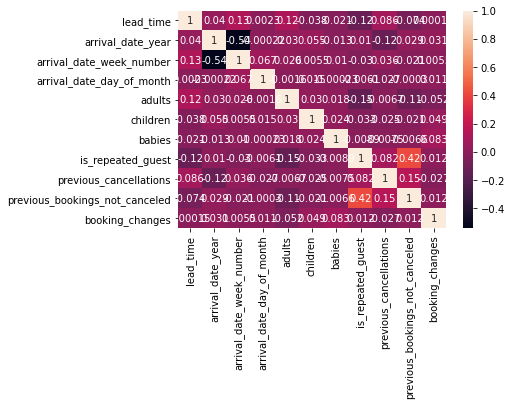

In [18]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, 
            annot=True)

In [19]:
model_df = df[['hotel','lead_time','arrival_date_year','arrival_date_month',
               'arrival_date_week_number','arrival_date_day_of_month','adults',
               'children','babies','meal','country']]

In [20]:
y = model_df.arrival_date_year

In [21]:
model_df.lead_time

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64

In [22]:
model_df[~model_df.meal.isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country
0,Resort Hotel,342,2015,July,27,1,2,0.0,0,BB,PRT
1,Resort Hotel,737,2015,July,27,1,2,0.0,0,BB,PRT
2,Resort Hotel,7,2015,July,27,1,1,0.0,0,BB,GBR
3,Resort Hotel,13,2015,July,27,1,1,0.0,0,BB,GBR
4,Resort Hotel,14,2015,July,27,1,2,0.0,0,BB,GBR
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,0.0,0,BB,BEL
119386,City Hotel,102,2017,August,35,31,3,0.0,0,BB,FRA
119387,City Hotel,34,2017,August,35,31,2,0.0,0,BB,DEU
119388,City Hotel,109,2017,August,35,31,2,0.0,0,BB,GBR


In [23]:
df.meal.isna().astype(int)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: meal, Length: 119390, dtype: int32

In [24]:
model_df['meal_missing'] = model_df.meal.isna()

<ipython-input-24-a632f61ee364>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['meal_missing'] = model_df.meal.isna()


In [25]:
model_df.drop(columns = ['meal'], inplace = True)

C:\Users\Welcome\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
model_df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,country,meal_missing
0,Resort Hotel,342,2015,July,27,1,2,0.0,0,PRT,False
1,Resort Hotel,737,2015,July,27,1,2,0.0,0,PRT,False
2,Resort Hotel,7,2015,July,27,1,1,0.0,0,GBR,False
3,Resort Hotel,13,2015,July,27,1,1,0.0,0,GBR,False
4,Resort Hotel,14,2015,July,27,1,2,0.0,0,GBR,False
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,0.0,0,BEL,False
119386,City Hotel,102,2017,August,35,31,3,0.0,0,FRA,False
119387,City Hotel,34,2017,August,35,31,2,0.0,0,DEU,False
119388,City Hotel,109,2017,August,35,31,2,0.0,0,GBR,False


In [27]:
model_df.lead_time.value_counts(normalize=True)

0      0.053145
1      0.028981
2      0.017330
3      0.015211
4      0.014365
         ...   
370    0.000008
435    0.000008
371    0.000008
380    0.000008
709    0.000008
Name: lead_time, Length: 479, dtype: float64

In [28]:
model_df.arrival_date_year.value_counts(normalize=True)

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64

In [29]:
model_df.arrival_date_week_number.value_counts(normalize=True)

33    0.029986
30    0.025856
32    0.025505
34    0.025463
18    0.024508
21    0.023905
28    0.023896
17    0.023494
20    0.023327
29    0.023143
42    0.023084
31    0.022958
41    0.022607
15    0.022523
27    0.022313
25    0.022305
38    0.022288
23    0.021953
35    0.021719
39    0.021618
22    0.021325
24    0.020923
13    0.020236
16    0.020144
19    0.020119
40    0.020077
26    0.020027
43    0.019700
44    0.019030
14    0.018963
37    0.018670
8     0.018561
36    0.018151
10    0.018000
9     0.017732
7     0.017665
12    0.017447
11    0.017338
45    0.016258
53    0.015211
49    0.014926
47    0.014113
46    0.013184
6     0.012631
50    0.012606
48    0.012597
4     0.012455
5     0.011617
3     0.011048
2     0.010202
52    0.010009
1     0.008770
51    0.007815
Name: arrival_date_week_number, dtype: float64

In [30]:
model_df.adults.value_counts(normalize=True)

2     0.751152
1     0.192872
3     0.051947
0     0.003375
4     0.000519
26    0.000042
5     0.000017
20    0.000017
27    0.000017
6     0.000008
10    0.000008
40    0.000008
50    0.000008
55    0.000008
Name: adults, dtype: float64

In [31]:
model_df.arrival_date_week_number.value_counts(normalize=True)

33    0.029986
30    0.025856
32    0.025505
34    0.025463
18    0.024508
21    0.023905
28    0.023896
17    0.023494
20    0.023327
29    0.023143
42    0.023084
31    0.022958
41    0.022607
15    0.022523
27    0.022313
25    0.022305
38    0.022288
23    0.021953
35    0.021719
39    0.021618
22    0.021325
24    0.020923
13    0.020236
16    0.020144
19    0.020119
40    0.020077
26    0.020027
43    0.019700
44    0.019030
14    0.018963
37    0.018670
8     0.018561
36    0.018151
10    0.018000
9     0.017732
7     0.017665
12    0.017447
11    0.017338
45    0.016258
53    0.015211
49    0.014926
47    0.014113
46    0.013184
6     0.012631
50    0.012606
48    0.012597
4     0.012455
5     0.011617
3     0.011048
2     0.010202
52    0.010009
1     0.008770
51    0.007815
Name: arrival_date_week_number, dtype: float64

In [32]:
model_df.groupby('adults')['children'].describe()

,count,mean,std,min,25%,50%,75%,max
adults,,,,,,,,
0,403.0,1.124069,1.029172,0.0,0.0,2.0,2.0,3.0
1,23027.0,0.026274,0.200657,0.0,0.0,0.0,0.0,3.0
2,89677.0,0.120187,0.428097,0.0,0.0,0.0,0.0,10.0
3,6201.0,0.091114,0.308879,0.0,0.0,0.0,0.0,2.0
4,62.0,0.032258,0.178127,0.0,0.0,0.0,0.0,1.0
5,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
10,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
20,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [33]:
model_df.groupby('adults')['babies'].describe()

,count,mean,std,min,25%,50%,75%,max
adults,,,,,,,,
0,403.0,0.007444,0.086065,0.0,0.0,0.0,0.0,1.0
1,23027.0,0.000955,0.063886,0.0,0.0,0.0,0.0,9.0
2,89680.0,0.010158,0.106740,0.0,0.0,0.0,0.0,10.0
3,6202.0,0.001935,0.043948,0.0,0.0,0.0,0.0,1.0
4,62.0,0.016129,0.127000,0.0,0.0,0.0,0.0,1.0
5,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
10,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
20,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [34]:
model_df.children.mean()

0.10388990333874994

In [35]:
model_df.children.fillna(model_df.children.mean(), inplace=True)

C:\Users\Welcome\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [36]:
model_df.isna().sum()

hotel                          0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
adults                         0
children                       0
babies                         0
country                      488
meal_missing                   0
dtype: int64

In [37]:
model_df = model_df[~model_df['country'].isna()]

In [38]:
model_df[model_df['meal_missing']==True].shape

(0, 11)

In [39]:
model_df[model_df['meal_missing']].shape

(0, 11)

In [40]:
model_df[~model_df['meal_missing']].shape

(118902, 11)

In [41]:
model_df.shape

(118902, 11)

In [42]:
model_df['meal_missing'] = np.where(model_df['meal_missing'], 1, 0)

<ipython-input-42-fc87b8b3a1ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['meal_missing'] = np.where(model_df['meal_missing'], 1, 0)


In [43]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hotel                      118902 non-null  object 
 1   lead_time                  118902 non-null  int64  
 2   arrival_date_year          118902 non-null  int64  
 3   arrival_date_month         118902 non-null  object 
 4   arrival_date_week_number   118902 non-null  int64  
 5   arrival_date_day_of_month  118902 non-null  int64  
 6   adults                     118902 non-null  int64  
 7   children                   118902 non-null  float64
 8   babies                     118902 non-null  int64  
 9   country                    118902 non-null  object 
 10  meal_missing               118902 non-null  int32  
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 10.4+ MB


In [44]:
pd.get_dummies(data=model_df)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal_missing,hotel_City Hotel,hotel_Resort Hotel,...,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE
0,342,2015,27,1,2,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,737,2015,27,1,2,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7,2015,27,1,1,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,13,2015,27,1,1,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,14,2015,27,1,2,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
119386,102,2017,35,31,3,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
119387,34,2017,35,31,2,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
119388,109,2017,35,31,2,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
model_df_final = pd.get_dummies(data=model_df, drop_first=True)

In [46]:
model_df_final.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'adults', 'children', 'babies',
       'meal_missing', 'hotel_Resort Hotel', 'arrival_date_month_August',
       ...
       'country_UMI', 'country_URY', 'country_USA', 'country_UZB',
       'country_VEN', 'country_VGB', 'country_VNM', 'country_ZAF',
       'country_ZMB', 'country_ZWE'],
      dtype='object', length=196)

In [47]:
X = model_df_final[['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'adults', 'children', 'babies',
       'meal_missing', 'hotel_Resort Hotel', 'arrival_date_month_August']]
y = model_df_final['lead_time']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()

In [53]:
lr.fit(X_train, y_train)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
lr.score(X_train, y_train)

0.05211257240777536

In [56]:
lr.score(X_test, y_test)

0.05323577646019932

In [57]:
lr.predict_proba(X_test)[:,1]

array([0.02965029, 0.0157788 , 0.02334293, ..., 0.0206457 , 0.04112765,
       0.01325252])

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
gnb = GaussianNB()

In [62]:
gnb.fit(X_train, y_train).predict(X_test)

array([423, 414, 282, ..., 433, 414, 464], dtype=int64)

In [63]:
gnb.score(X_test, y_test)

0.015096085109961735